# [CptS 215 Data Analytics Systems and Algorithms](https://piazza.com/wsu/fall2017/cpts215/home)
[Washington State University](https://wsu.edu)

[Gina Sprint](http://eecs.wsu.edu/~gsprint/)
# L3-3 Plotting

Learner objectives for this lesson
* Generate plots using matplotlib

## Acknowledgments
Content used in this lesson is based upon information in the following sources:
* [Jupyter website](http://jupyter.org/)
* [Matplotlib website](http://matplotlib.org/faq/usage_faq.html)

## Matplotlib
Data visualization is important at many steps in the data analytics work flow. Exploratory data analysis includes plotting the data to get a birds-eye view of the data. Plots can quickly tell you if there are missing data, outliers, and general trends/patterns. Once the data analysis has moved beyond the exploratory phase, plots are generated to summarize results and include in a write-up of findings.

While there are many data visualization libraries available in Python, we will focus on using the [Matplotib](https://matplotlib.org/) package for the following reasons:
1. It is easy to use
1. It is highly documented and widely used
1. It has Jupyter Notebook support

There are different ways to use matplotlib:
1. `matplotlib.pyplot` module: a non-OOP, state-machine environment is the interface to simple functions to add plot elements to the current axes in the current figure. The state-machine implicitly and automatically creates figures and axes to achieve the desired plot.
1. Hybrid `pyplot`/OOP: using `pyplot` for figure generation, but the programmer keeps track of the figure and axes objects.
1. Purely object oriented interface: useful for embedding matplotlib plots in GUI applications.

We will mostly work with the first two options.

### Plotting in Jupyter Notebook
One major feature of the Jupyter Notebook is the ability to display plots that are the output of running code cells. The IPython kernel is designed to work seamlessly with the matplotlib plotting library to provide this functionality. Specific plotting library integration is a feature of the kernel.

Let's generate a matplotlib figure. First, we need to let Jupyter Notebook know to render matplotlib plots in line with the Notebook with the magic command `%matplotlib inline`. Then we need to `import matplotlib.pyplot`, make up some x and y values, and plot away!

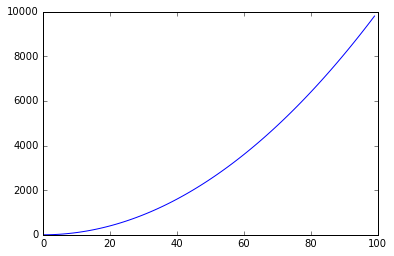

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
x = list(range(0, 100))
squares = [num ** 2 for num in x]
plt.plot(x, squares)

We can change the code in the above cell and re-run the cell, the plot will be updated.

Note: `plt.plot()` returns a list of `Lines2D` objects, which we are ignoring (for now).

### Parts of a Figure
<img src="http://matplotlib.org/_images/fig_map.png" width=300>
(image from [http://matplotlib.org/faq/usage_faq.html](http://matplotlib.org/faq/usage_faq.html))

The following class descriptions are adapted from the [Matplotlib website](http://matplotlib.org/faq/usage_faq.html): 

#### Figure
The figure keeps track of all the child Axes, a smattering of 'special' artists (titles, figure legends, etc), and the canvas. (Don't worry too much about the canvas, it is crucial as it is the object that actually does the drawing to get you your plot, but as the user it is more-or-less invisible to you). A figure can have any number of `Axes`, but to be useful should have at least one.

#### Axes
This is what you think of as 'a plot', it is the region of the image with the data space (marked as the inner blue box). A given figure can contain many `Axes`, but a given `Axes` object can only be in one Figure. The `Axes` contains two (or three in the case of 3D) `Axis` objects (be aware of the difference between `Axes` and `Axis`) which take care of the data limits (the data limits can also be controlled via set via the `set_xlim()` and `set_ylim()` `Axes` methods). Each `Axes` has a title (set via `set_title()`), an x-label (set via `set_xlabel()`), and a y-label set via `set_ylabel()`).

The `Axes` class and it's member functions are the primary entry point to working with the OOP interface.

#### Axis
These are the number-line-like objects (circled in green). They take care of setting the graph limits and generating the ticks (the marks on the axis) and ticklabels (strings labeling the ticks). The location of the ticks is determined by a `Locator` object and the ticklabel strings are formatted by a `Formatter`. The combination of the correct `Locator` and `Formatter` gives very fine control over the tick locations and labels.

#### Artist
Basically everything you can see on the figure is an artist (even the `Figure`, `Axes`, and `Axis` objects). This includes `Text` objects, `Line2D` objects, collection objects, Patch objects ... (you get the idea). When the figure is rendered, all of the artists are drawn to the canvas. Most `Artist`s are tied to an `Axes`; such an `Artist` cannot be shared by multiple `Axes`, or moved from one to another.

### Line Plots
Line plots are used to plot (x, y) pairs. The pairs can be connected by a line, or not connected by a line.

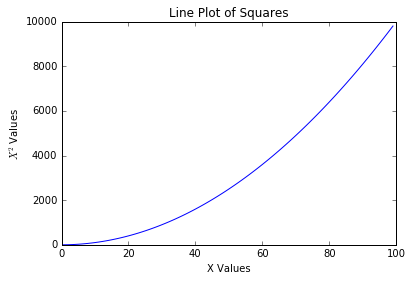

In [6]:
x = list(range(0, 100))
squares = [num ** 2 for num in x]
plt.xlabel("X Values")
# Latex!!
plt.ylabel("$X^2$ Values")
plt.title("Line Plot of Squares")
plt.plot(x, squares)

We can add alot of bells and whistles to our plot:
1. Formatting for the line and markers
1. Title
1. X and Y axis labels
1. Legend
1. More

Read the [matplotlib lines API](http://matplotlib.org/api/lines_api.html) to find out all the possible options. Here are a few examples:

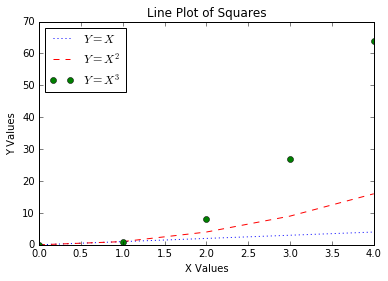

In [54]:
# downsampling in order to see the markers more clearly
x = list(range(0, 5))
squares = [num ** 2 for num in x]
cubes = [num ** 3 for num in x]
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.title("Line Plot of Squares")
plt.plot(x, x, c="b", ls=":", label="$Y=X$")
plt.plot(x, squares, c="r", ls="--", label="$Y=X^{2}$")
plt.plot(x, cubes, c="g", ls="", marker="o", label="$Y=X^{3}$")
# loc is a keyword to set the legend's location
plt.legend(loc=2)

### Bar Plots
The following example is adapted from the [Matplotlib website](http://matplotlib.org/examples/pylab_examples/barchart_demo.html):

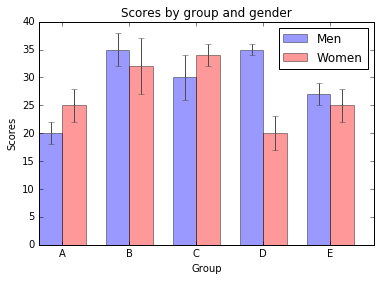

In [60]:
n_groups = 5

means_men = (20, 35, 30, 35, 27)
std_men = (2, 3, 4, 1, 2)

means_women = (25, 32, 34, 20, 25)
std_women = (3, 5, 2, 3, 3)

fig, ax = plt.subplots()

index = list(range(n_groups))
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, means_men, bar_width,
                 alpha=opacity,
                 color='b',
                 yerr=std_men,
                 error_kw=error_config,
                 label='Men')

index_shifted = [x + bar_width for x in index]
rects2 = plt.bar(index_shifted, means_women, bar_width,
                 alpha=opacity,
                 color='r',
                 yerr=std_women,
                 error_kw=error_config,
                 label='Women')

plt.xlabel('Group')
plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(index_shifted, ('A', 'B', 'C', 'D', 'E'))
plt.legend()

### Histograms
The following example is adapted from the [Matplotlib website](http://matplotlib.org/users/pyplot_tutorial.html):

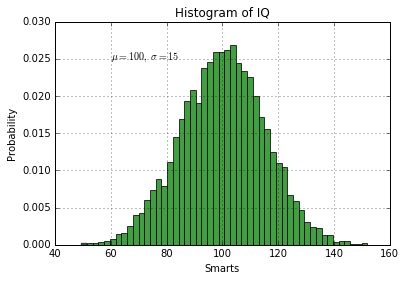

In [70]:
import random
mu, sigma = 100, 15
x = [random.gauss(mu, sigma) for i in range(10000)]

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

### Scatter Plots
The following example is adapted from the [Matplotlib website](http://matplotlib.org/examples/shapes_and_collections/scatter_demo.html):

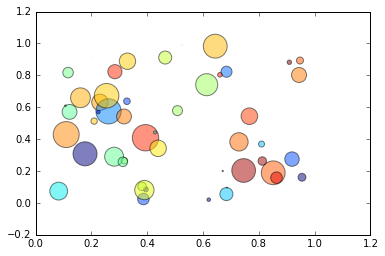

In [74]:
import random, math

N = 50
x = [random.random() for i in range(N)]
y = [random.random() for i in range(N)]
colors = [random.random() for i in range(N)]
area = [math.pi * (15 * random.random())**2 for i in range(N)]  # 0 to 15 point radiuses

plt.scatter(x, y, s=area, c=colors, alpha=0.5)

### Multiple Axes
We can make figures with multiple subplots (i.e. `Axes`). To do this we use the `subplot()` function. `subplot` expects three arguments, the number of rows of subplots, the number of subplots in each row (i.e. the number of columns), and which index of the subplot to set as the current `Axes` to plot. These three arguments are often combined to form a single integer argument. For example, this code creates a 2x2 grid of subplots and plots the squares line in 4 different colors:

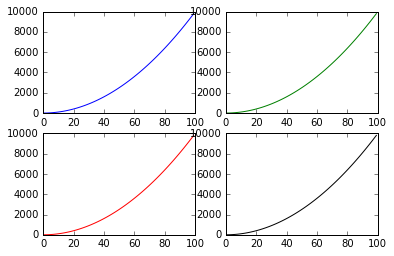

In [75]:
x = list(range(0, 100))
squares = [num ** 2 for num in x]
plt.subplot(221)
plt.plot(x, squares, c="blue")

plt.subplot(222)
plt.plot(x, squares, c="green")

plt.subplot(223)
plt.plot(x, squares, c="red")

plt.subplot(224)
plt.plot(x, squares, c="black")

## OO Interface
Since pyplot functions modify the "current `Figure`", we may want to explicitly store references to `Figure` and `Axes` objects to update later in the code. There are a few ways to do this:
1. `plt.gcf()` and `plt.gca()`: returns references to the current `Figure` (e.g. `gcf()`) and `Axes` (e.g. `gca()`)
1. `plt.subplots()`: creates new `Figure` and `Axes` objects
    * Example: `fig, ax = plt.subplots()`
    
## Closing Thoughts
<img src="https://imgs.xkcd.com/comics/convincing.png" width="700">
(image from [https://imgs.xkcd.com/comics/convincing.png](https://imgs.xkcd.com/comics/convincing.png))

Note: matplotlib has an XKCD theme! Check it out: [matplotlib XKCD example](https://matplotlib.org/xkcd/examples/showcase/xkcd.html).